In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import f

**Setup**

**Setup**

*The F-Test is a statistical test for the hypothesis that two distributions have the same variance.*

Let $X_1,...,X_n$ iid $\sim \mathcal{N}(\mu_x, \sigma_x^2)$ and  $Y_1,...,Y_n$ iid $\sim \mathcal{N}(\mu_y, \sigma_y^2)$, with X and Y independent.

The null hypothesis is $H_0 : \sigma_x^2 / sigma_y^2 = 1$, ie. both distributions have the same variance.

Let

$
\begin{align*}
F_{XY} := \frac{S_x^2}{S_y^2}, F_{YX} := \frac{S_y^2}{S_x^2}
\end{align*}
$

where $S^2$ is the pooled unbiased sample variance, ie.

$
\begin{align*}
S_x^2 = \frac{1}{n-1}\sum_{i=1}^n(X_i - \bar{X})^2,\ \ \ S_y^2 = \frac{1}{m-1}\sum_{i=1}^m(Y_i - \bar{Y})^2.
\end{align*}
$

$n,m$ are the number of samples of $X$ and $Y$ respectively and, *if $X,Y$ are normally distributed*, then $Z$ follows an F-distribution with $n-1$ over $m-1$ degrees of freedom. If we want to test deviations in both directions (ie. $\sigma_x > \sigma_y or \sigma_y > \sigma_x$) *ie.* we want a two-tailed test. However (from what I understand), since the ratio of variances is positive, F has no support below zero, and we can't directly perform a two sided test. The solution is to be to combine the two one-sided tests for the alternative hypotheses $\sigma_x > \sigma_y$ and $\sigma_y > \sigma_x$: We reject if $F > q_{inf}^F(\frac{\alpha}{2})$ or $F^{-1} > q_{inf}^F(\frac{\alpha}{2})$. The p-value is

$
F(F > F_{XY}; n-1, m-1) + F(F > F_{YX}; m-1, n-1)
$

To implement, I calculate the pivot and use cdf in `scipy.stats.f` to compute the p-value as described above.

In [38]:
N = [100, 1000]#(10**(np.arange(0.5,5,0.5))).round().astype(int)
trials = 10
mu = 0
sigma_x = 2
sigma_y = 1
alpha = 0.05

print("SETUP\nno. of samples: %s" % N)
print("no. of trials for each sample size: %d" % trials)
print("X ~ N(%0.2f, %0.2f)" % (mu, sigma_x))
print("Y ~ N(%0.2f, %0.2f)" % (mu, sigma_y))
print("In this case, the null hypothesis is %s" % (sigma_x == sigma_y))

SETUP
no. of samples: [100, 1000]
no. of trials for each sample size: 10
X ~ N(0.00, 2.00)
Y ~ N(0.00, 1.00)
In this case, the null hypothesis is False


In [55]:
def ftest(X,Y,axis):
    """Return the pivot and p-value of the F-test for the given samples"""
    S_x = np.var(X, axis, ddof=1)
    S_y = np.var(Y, axis, ddof=1)
    F = S_y / S_x
    d1, d2 = len(X) - 1, len(Y) - 1
    p_value = 2*(1 - f.cdf(F, d2, d1))
    return F, p_value

Text(0, 0.5, 'rejection %')

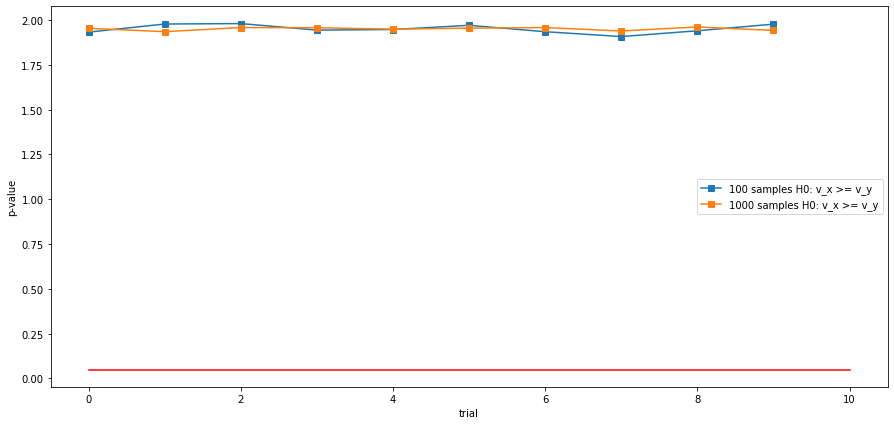

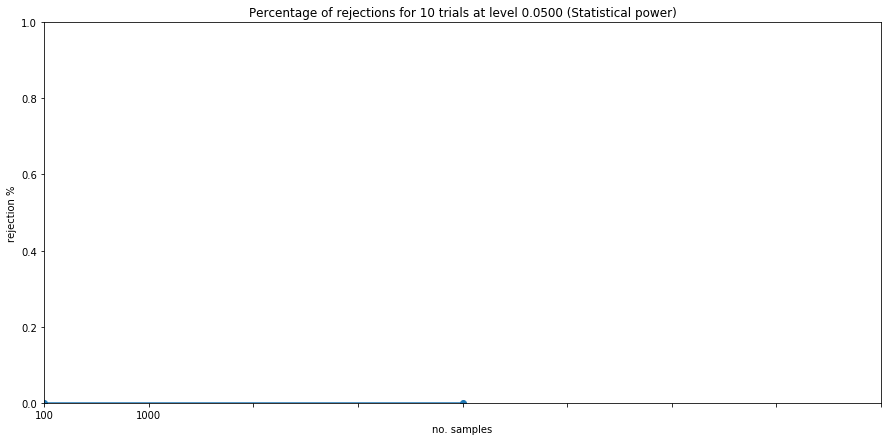

In [57]:
# Run tests and plot results
plt.figure(figsize=(15,7))
rejected = np.zeros(len(N))
for i,n in enumerate(N):    
    X = np.random.normal(mu, sigma_x,size=(trials,n))
    Y = np.random.normal(mu, sigma_y, size=(trials,n))
    (_, p_value) = ftest(X, Y, axis=1)
    plt.plot(p_value, "-s", label="%d samples H0: v_x >= v_y" % n)    
    rejected[i] = np.sum((p_value <= alpha/2).astype(int)) / trials
plt.plot([0,trials], [alpha, alpha], '-r')
plt.xlabel("trial")
plt.ylabel("p-value")
plt.legend()

fig = plt.figure(figsize=(15,7))
plt.plot(rejected, '-o')
plot_meaning = "Statistical power" if sigma_x != sigma_y else "Type 1 error rate"
plt.title("Percentage of rejections for %d trials at level %0.4f (%s)" % (trials, alpha, plot_meaning))
ax = plt.gca()
ax.set_xticklabels(N)
plt.axis([0, len(N), 0, 1])
plt.xlabel("no. samples")
plt.ylabel("rejection %")